# PyTorch 入门教程

欢迎来到本周的编程作业。到目前为止，你一直使用 numpy 来构建神经网络。现在我们将引导你使用一个深度学习框架，让你更轻松地构建神经网络。像 PyTorch、TensorFlow、PaddlePaddle、Caffe、Keras 等机器学习框架，可以显著加快你的机器学习开发速度。这些框架都有丰富的文档，你可以自由阅读。本节你将学习在 PyTorch 中完成以下任务：

- 初始化变量（张量）
- 训练算法
- 实现神经网络

PyTorch 作为一个动态计算图框架，代码结构更接近 Python 原生，调试更方便。编程框架不仅能缩短你的编码时间，有时还能进行优化，提升代码运行速度。



## 1 导入 PyTorch 库


In [6]:
# 导入所需的库
import math                         # 导入数学库，包含数学运算函数
import numpy as np                  # 导入numpy，用于数值计算和数组操作
import h5py                         # 用于读写hdf5格式数据文件
import matplotlib.pyplot as plt    # 导入绘图库matplotlib中的pyplot，用于绘图
import torch                        # 导入PyTorch库，核心深度学习框架
import torch.nn.functional as F    # 导入PyTorch中的函数接口，包含激活函数、损失函数等
import torch.nn as nn              # 导入PyTorch中的神经网络模块，包含构建网络的类
import torch.optim as optim         # 导入PyTorch中的优化器模块，包含常用优化算法
from torch.utils.data import DataLoader, TensorDataset  # 导入数据加载工具，用于生成训练小批次

# matplotlib内联显示，Jupyter Notebook中显示图像
%matplotlib inline

# 设置随机种子，保证结果可复现
np.random.seed(1)              # 固定numpy随机种子
torch.manual_seed(1)           # 固定PyTorch随机种子


## 2 初识PyTorch-以线性模型为例


#### 2.1 张量（Tensor）与 NumPy 的关系

在 PyTorch 中，**Tensor（张量）** 是最重要的数据结构。

- 张量可以理解为“多维数组”，类似于 NumPy 的 `ndarray`。
- 不同之处在于：
    - PyTorch 的张量可以放在 **GPU** 上进行加速运算。
    - PyTorch 内置 **自动求导功能**，为深度学习训练提供便利。

#### 为什么要学习张量？
在深度学习中，数据通常是高维的：
- **标量（Scalar）**：只有一个数字，例如 `3`
- **向量（Vector）**：一维数组，例如 `[1, 2, 3]`
- **矩阵（Matrix）**：二维数组，例如：
    \[
    \begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6
    \end{bmatrix}
    \]
- **张量（Tensor）**：多维数据，例如图片、视频等。

学习张量的操作方法，就相当于掌握了深度学习中处理数据的基本能力。


In [7]:
# 创建一个 2x3 的张量
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  
print("张量 x：\n", x)

# 从 NumPy 数组创建张量
np_array = np.array([[1, 2], [3, 4]])
tensor_from_np = torch.from_numpy(np_array)  
print("从 NumPy 创建的张量：\n", tensor_from_np)

# 将张量转为 NumPy 数组
back_to_np = tensor_from_np.numpy()  
print("转回 NumPy 数组：\n", back_to_np)

# 在 GPU 上创建张量（如果可用）
if torch.cuda.is_available():
    x_gpu = x.to("cuda")  
    print("在 GPU 上的张量：", x_gpu)


张量 x：
 tensor([[1, 2, 3],
        [4, 5, 6]])
从 NumPy 创建的张量：
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
转回 NumPy 数组：
 [[1 2]
 [3 4]]


#### 2.2 自动求导机制（Autograd）

在神经网络训练中，我们需要不断计算 **梯度（Gradient）** 来更新模型参数。

如果手动计算梯度会非常复杂，而 PyTorch 提供了 **autograd** 模块，
只要在创建张量时设置 `requires_grad=True`，PyTorch 就会自动跟踪计算过程并计算梯度。

**核心步骤：**
1. 创建需要梯度的张量。
2. 执行前向计算（Forward）。
3. 调用 `.backward()` 自动计算梯度。
4. 通过 `.grad` 查看梯度值。


In [8]:
# 创建一个需要计算梯度的张量 w
# torch.tensor(data, dtype=None, device=None, requires_grad=False)
# 参数说明：
# data = 2.0             初始值为 2.0
# requires_grad = True   表示需要追踪该张量的梯度，用于自动微分
w = torch.tensor(2.0, requires_grad=True)  

# 创建另一个需要计算梯度的张量 b
# 初始值为 1.0，梯度也会在计算图中被追踪
b = torch.tensor(1.0, requires_grad=True)  

# 定义输入 x，不需要计算梯度
x = torch.tensor(3.0)  

# 前向计算：y = w * x + b
# w = 2.0, x = 3.0, b = 1.0
# 代入公式：y = 2*3 + 1 = 7
y = w * x + b  

# 执行反向传播，自动计算 y 对 w 和 b 的梯度
# backward() 会从标量 y 开始，沿计算图反向传播梯度
y.backward()  

# 打印 w 的梯度
# 理论推导：dy/dw = x = 3
print("w 的梯度：", w.grad)  

# 打印 b 的梯度
# 理论推导：dy/db = 1
print("b 的梯度：", b.grad)  



w 的梯度： tensor(3.)
b 的梯度： tensor(1.)


#### 2.3 构建简单的线性模型

在深度学习中，**线性模型** 是最基础的模型之一。

**公式：**
$Y = WX + b$
其中：
-  $W$：权重（weight）
-  $b$：偏置（bias）
-  $X$ ：输入数据
-  $Y$：预测输出

在 PyTorch 中，我们一般通过继承 `torch.nn.Module` 来构建模型：
- 在 `__init__()` 中定义层（Layer）。
- 在 `forward()` 中定义前向计算过程。


In [9]:
# 定义一个线性模型类 LinearModel，继承自 nn.Module（这是所有 PyTorch 模型的基类）
class LinearModel(nn.Module):
    def __init__(self):  
        # 调用父类 nn.Module 的初始化方法，确保父类中的功能被正确初始化
        super(LinearModel, self).__init__()  

        # 定义一个线性层 nn.Linear
        # nn.Linear(in_features, out_features, bias=True)
        # 参数说明：
        # in_features = 1   输入特征的维度为 1（即输入是一个一维数值）
        # out_features = 1  输出特征的维度为 1（即输出也是一个一维数值）
        # bias = True       默认会加上一个偏置项 b
        self.linear = nn.Linear(1, 1)  

    # 前向传播函数，定义数据如何通过网络流动
    # 每次调用 model(input) 时，都会自动运行 forward() 方法
    def forward(self, x):
        # 输入张量 x 经过线性层 self.linear 后得到输出
        return self.linear(x)

# 创建 LinearModel 类的实例，即生成一个具体的模型对象
model = LinearModel()  

# 打印模型的结构信息，展示其中包含的层
print(model)  


LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


#### 2.4：损失函数与优化器

在训练模型时，我们需要：
1. **损失函数（Loss Function）**：
   - 衡量模型预测值和真实值的差异。
   - 常见损失：
     - 均方误差（MSELoss）：用于回归。
     - 交叉熵（CrossEntropyLoss）：用于分类。
2. **优化器（Optimizer）**：
   - 根据梯度更新模型参数。
   - 常见优化算法：
     - SGD（随机梯度下降）
     - Adam（自适应梯度优化）


In [10]:
# 定义损失函数（均方误差，Mean Squared Error Loss）
# nn.MSELoss(size_average=None, reduce=None, reduction='mean')
# 参数说明：
# reduction = 'mean'  默认取均值，即损失 = 所有样本误差平方和 / 样本数
# reduction = 'sum'   则取总和
# 用于回归问题，衡量预测值和真实值的差距
loss_fn = nn.MSELoss()                  

# 定义优化器（随机梯度下降，Stochastic Gradient Descent）
# torch.optim.SGD(params, lr=<required>, momentum=0, dampening=0,
#                 weight_decay=0, nesterov=False, maximize=False, foreach=None)
# 参数说明：
# params = model.parameters()  需要被优化的参数，即模型中的权重和偏置
# lr = 0.01                   学习率（learning rate），控制每次参数更新的步长
# momentum = 0                 默认不使用动量，可加速收敛
# weight_decay = 0             默认无权重衰减，可用于 L2 正则化
#nesterov=False                不用 Nesterov 动量（可以在 momentum>0 时设为 True）。
#maximize=False                默认最小化损失；如果 True，则最大化目标函数。
#foreach=None                  是否用更快的底层循环优化，默认自动选择。
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  

#### 2.5 训练循环

训练模型的过程是一个循环：
1. **前向传播（Forward）**：计算预测值。
2. **计算损失（Loss）**。
3. **梯度清零（optimizer.zero_grad()）**。
4. **反向传播（loss.backward()）**：计算梯度。
5. **更新参数（optimizer.step()）**。


In [11]:
# ========== 定义模型 ==========
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # 线性层：输入维度=1，输出维度=1
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

# 创建模型
model = LinearModel()  

# 定义损失函数：均方误差（MSE）
loss_fn = nn.MSELoss()  

# 定义优化器：随机梯度下降（SGD），学习率=0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  

# ========== 训练数据 ==========
# 输入特征 x_train（3 个样本，每个样本 1 维）
x_train = torch.tensor([[1.0], [2.0], [3.0]])  
# 目标输出 y_train（线性关系：y = 2x）
y_train = torch.tensor([[2.0], [4.0], [6.0]])  

# ========== 训练循环 ==========
for epoch in range(100):  
    # 前向传播：输入训练数据，计算预测值
    y_pred = model(x_train)              

    # 计算损失：预测值与真实值之间的均方误差
    loss = loss_fn(y_pred, y_train)      

    # 梯度清零：防止梯度累加
    optimizer.zero_grad()                

    # 反向传播：计算梯度（loss 对参数的偏导）
    loss.backward()                      

    # 参数更新：利用优化器（SGD）更新模型参数 w 和 b
    optimizer.step()                      

    # 每 10 轮打印一次损失
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")  


Epoch [10/100], Loss: 2.4095
Epoch [20/100], Loss: 0.3996
Epoch [30/100], Loss: 0.2003
Epoch [40/100], Loss: 0.1737
Epoch [50/100], Loss: 0.1639
Epoch [60/100], Loss: 0.1560
Epoch [70/100], Loss: 0.1487
Epoch [80/100], Loss: 0.1417
Epoch [90/100], Loss: 0.1350
Epoch [100/100], Loss: 0.1287


注意：
optimizer.zero_grad() 是 PyTorch 中 torch.optim.Optimizer 的方法，用来清除（重置）优化器所管理参数的梯度，避免梯度在多次反向传播间累加（accumulate）。在常规训练循环里，每次 loss.backward() 之前通常需要调用它。
自动微分 loss.backward() 会累加梯度到参数的 .grad 属性上,因此如果不在每次迭代前（或在合适的时机）清零，前一次计算得到的梯度会与当前梯度相加，导致参数更新方向错误（除非你有意做梯度累加）。

#### 2.6逻辑回归二分类案例

逻辑回归用于二分类任务：
- 输入特征经过线性变换。
- 使用 Sigmoid 将结果压缩到 (0, 1) 范围，表示概率。
- 使用 **BCEWithLogitsLoss** 作为损失（内部自带 Sigmoid 计算）。


In [12]:
# ==========================
# 定义逻辑回归模型 LogisticRegression
# ==========================
class LogisticRegression(nn.Module):
    def __init__(self):
        # 调用父类 nn.Module 的构造函数，保证模型能正确注册子模块
        super(LogisticRegression, self).__init__()
        # 定义一个线性层（Linear 层）
        # nn.Linear(in_features, out_features, bias=True)
        # 参数说明：
        # in_features = 2   输入特征维度是 2（例如二维数据点）
        # out_features = 1  输出特征维度是 1（二分类问题只需要一个概率值）
        # bias = True       默认添加偏置项 b
        self.linear = nn.Linear(2, 1)

    # 前向传播函数，定义输入数据如何流经网络
    def forward(self, x):
        # 输出线性层的计算结果： z = xW + b
        # 注意：这里没有加 Sigmoid，因为后面我们会用 BCEWithLogitsLoss，
        # 该损失函数内部已经包含 Sigmoid 运算
        return self.linear(x)

# ==========================
# 定义训练数据
# ==========================
# 输入特征矩阵（4 个样本，每个样本 2 个特征）
x_data = torch.tensor([[2.0, 1.0],
                       [1.0, 3.0],
                       [2.5, 1.5],
                       [3.0, 4.0]])
# 标签 y_data（二分类标签，每个样本 0 或 1）
y_data = torch.tensor([[0.0], [0.0], [0.0], [1.0]])

# ==========================
# 初始化模型、损失函数、优化器
# ==========================
# 创建 LogisticRegression 模型实例
model = LogisticRegression()

# 定义损失函数：二分类交叉熵（带 Logits 版本）
# nn.BCEWithLogitsLoss() 等价于 Sigmoid + BCELoss 的组合
criterion = nn.BCEWithLogitsLoss()

# 定义优化器：随机梯度下降 SGD
# torch.optim.SGD(params, lr=0.1)
# params = model.parameters() → 传入需要优化的模型参数
# lr = 0.1 → 学习率，控制每次参数更新的步长
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# ==========================
# 训练循环
# ==========================
for epoch in range(100):
    # 前向传播：输入数据 → 模型 → 输出预测值
    outputs = model(x_data)
    
    # 计算损失函数：预测值 outputs 与真实标签 y_data 的差距
    loss = criterion(outputs, y_data)

    # 梯度清零：避免梯度在反向传播时累加
    optimizer.zero_grad()
    
    # 反向传播：自动计算 loss 对模型参数的梯度
    loss.backward()
    
    # 参数更新：根据梯度和学习率更新模型参数
    optimizer.step()

    # 每 20 轮打印一次损失，方便观察训练效果
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')


Epoch [20/100], Loss: 0.5857
Epoch [40/100], Loss: 0.5570
Epoch [60/100], Loss: 0.5302
Epoch [80/100], Loss: 0.5053
Epoch [100/100], Loss: 0.4821


# 3 用 PyTorch 构建你的第一个神经网络

你将使用 PyTorch 构建一个神经网络。请记住，使用 PyTorch 实现模型的流程通常包括：

- 定义模型类（继承 `nn.Module`），构建网络结构
- 定义前向传播函数（`forward` 方法）
- 定义损失函数和优化器
- 训练模型时，循环遍历数据，前向计算，反向传播，参数更新

### 3.1加载 SIGNS 数据集
#### 1. 数据集介绍

某天下午，我和朋友们决定教计算机识别手语。我们花了几个小时在白墙前拍照，收集了如下数据集。你的任务是构建一个算法，帮助言语障碍者与不懂手语的人沟通。这个数据集来自于手语数字识别任务（数字 0~5），每张图片是一个手势照片，对应一个类别。

- **训练集**：1080 张图片，每张64×64像素，表示数字 0 到 5 的手势（每个数字180张图片）。
- **测试集**：120 张图片，每张64×64像素，表示数字 0 到 5 的手势（每个数字20张图片）。

注意，这只是 SIGNS 数据集的一个子集，完整数据集包含更多手势。

以下是每个数字的样例图片，以及我们如何表示标签的说明。这些是原始图片，分辨率较高，未缩小到64×64像素。
<img src="images/hands.png" style="width:800px;height:350px;">
<caption><center> <u><font color='purple'> **图1** </u><font color='purple'>：SIGNS 数据集示例<br> <font color='black'> </center>


#### 2. 数据存储格式
数据存储在 **HDF5 格式** 文件中：
- `train_signs.h5`  
- `test_signs.h5`

HDF5 是一种高效存储多维数组的文件格式，可以方便地读取成 NumPy 或 PyTorch 张量。

文件内容大致包括：
- `train_set_x`：训练集的图像数据（形状：`(m_train, height, width, channels)`）
- `train_set_y`：训练集的标签数据（形状：`(m_train,)`）
- `test_set_x`：测试集的图像数据
- `test_set_y`：测试集的标签数据
- `list_classes`：类别列表，例如 `[0, 1, 2, 3, 4, 5]`


#### 3. 读取数据的步骤
1. 用 `h5py.File()` 打开 HDF5 文件。
2. 将数据读取为 **NumPy 数组**。
3. 如果需要，可以适当调整标签形状（例如调整为 `(1, m)` 格式）。
4. 转换为 PyTorch 的 `Tensor`（特征用 `float32`，标签用 `long` 类型）。


#### 4. 注意事项
- 读取后图片的像素值范围是 **0~255**，后续需要进行归一化。
- 标签需要是整数类别，而不是 one-hot 编码。
- `(样本数, 高, 宽, 通道)` 这种形状在 PyTorch 中要转换成 `(样本数, 通道, 高, 宽)` 才能送入卷积神经网络。



In [13]:
# ==============================
# 数据加载函数
# ==============================
def load_dataset():
    """
    功能：
        从 h5 文件中加载训练集、测试集以及类别标签。
    返回：
        X_train_orig : numpy.ndarray
            训练集图像，形状为 (m_train, H, W, C)，
            其中 m_train 是训练样本数，H/W 是高度和宽度，C 是通道数（通常是3，表示RGB）。
        Y_train_orig : numpy.ndarray
            训练集标签，形状为 (m_train,)。
        X_test_orig : numpy.ndarray
            测试集图像，形状为 (m_test, H, W, C)。
        Y_test_orig : numpy.ndarray
            测试集标签，形状为 (m_test,)。
        classes : numpy.ndarray
            所有类别的列表，形状为 (num_classes,)。
    """

    # ==============================
    # 1 加载训练数据集
    # ==============================
    # 打开训练集的 h5 文件，路径为 datasets/train_signs.h5，"r" 表示只读模式
    train_dataset = h5py.File('datasets/train_signs.h5', "r")

    # 从训练集文件中读取图像数据，键名为 "train_set_x"
    # 通过 [:] 取出全部数据，转换为 numpy 数组
    # 数据形状一般是 (m_train, H, W, C)
    X_train_orig = np.array(train_dataset["train_set_x"][:])

    # 从训练集文件中读取标签数据，键名为 "train_set_y"
    # 形状是 (m_train,)，里面存储的值是类别索引
    Y_train_orig = np.array(train_dataset["train_set_y"][:])

    # ==============================
    # 2 加载测试数据集
    # ==============================
    # 打开测试集的 h5 文件
    test_dataset = h5py.File('datasets/test_signs.h5', "r")

    # 读取测试集图像数据 (m_test, H, W, C)
    X_test_orig = np.array(test_dataset["test_set_x"][:])

    # 读取测试集标签 (m_test,)
    Y_test_orig = np.array(test_dataset["test_set_y"][:])

    # ==============================
    # 3 加载类别列表
    # ==============================
    # 类别标签数组，存储的是类别的实际含义（比如 0~5 表示不同手势）
    classes = np.array(test_dataset["list_classes"][:])

    # ==============================
    # 4 返回结果
    # ==============================
    return X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes


In [14]:
# ==============================
# 调用数据加载函数
# ==============================

# 调用我们上面定义的 load_dataset() 函数
# 该函数会返回 5 个变量，分别是：
#   X_train_orig : 训练集特征 (m_train, H, W, C)
#   Y_train_orig : 训练集标签 (m_train,)
#   X_test_orig  : 测试集特征 (m_test, H, W, C)
#   Y_test_orig  : 测试集标签 (m_test,)
#   classes      : 类别列表 (num_classes,)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# ==============================
# 打印数据维度，帮助理解数据结构
# ==============================

# 打印训练集图像数据的维度
# 输出形如 (1080, 64, 64, 3)，表示 1080 张 64x64 的 RGB 图像
print("训练集特征 shape:", X_train_orig.shape)

# 打印训练集标签的维度
# 输出形如 (1080,)，每个元素是一个类别编号
print("训练集标签 shape:", Y_train_orig.shape)

# 打印测试集图像数据的维度
# 输出形如 (120, 64, 64, 3)，表示 120 张测试图像
print("测试集特征 shape:", X_test_orig.shape)

# 打印测试集标签的维度
# 输出形如 (120,)，每个元素是一个类别编号
print("测试集标签 shape:", Y_test_orig.shape)

# 打印类别列表，比如 [b'0', b'1', b'2', b'3', b'4', b'5']
# 注意：这里的 b'0' 表示字节类型，可以用 .decode("utf-8") 转换为字符串
print("类别列表:", classes)


训练集特征 shape: (1080, 64, 64, 3)
训练集标签 shape: (1080,)
测试集特征 shape: (120, 64, 64, 3)
测试集标签 shape: (120,)
类别列表: [0 1 2 3 4 5]


### 3.2 数据预处理 + 可视化

在我们将数据送入神经网络之前，需要先做**数据预处理**。  
这一步的目的主要有两个：
1. **让数据格式符合 PyTorch 的要求**（比如通道顺序、数据类型等）。
2. **让模型更容易学习**，比如通过归一化，让像素值在 0-1 范围内，而不是 0-255。


#### 1️⃣ 数据预处理步骤

1. **查看数据形状**
    - 确认数据的维度是 `(样本数, 高, 宽, 通道)` 还是 `(样本数, 通道, 高, 宽)`。
    - PyTorch 要求的是 **通道优先** 格式，即 `(N, C, H, W)`。
2. **归一化处理**
    - 原始像素值范围是 `0~255`，我们将它缩放到 `0~1`，这样能让梯度下降更稳定。
3. **标签维度调整**
    - 确保标签是一维向量 `(N,)` 而不是 `(1, N)`。


In [15]:
# ==============================
# 数据预处理函数
# ==============================
def preprocess_data(X_train_orig, Y_train_orig, X_test_orig, Y_test_orig):
    """
    功能：对原始数据进行展平、归一化和标签格式转换
    参数：
        X_train_orig -- 原始训练集特征，shape = (m_train, H, W, C)，像素值范围 0~255
        Y_train_orig -- 原始训练集标签，shape = (m_train,)
        X_test_orig  -- 原始测试集特征，shape = (m_test, H, W, C)
        Y_test_orig  -- 原始测试集标签，shape = (m_test,)
    返回：
        X_train -- 预处理后的训练集特征，shape = (m_train, H*W*C)，浮点型，范围 0~1
        Y_train -- 预处理后的训练集标签，shape = (m_train,)
        X_test  -- 预处理后的测试集特征，shape = (m_test, H*W*C)，浮点型，范围 0~1
        Y_test  -- 预处理后的测试集标签，shape = (m_test,)
    """

    # =========
    # 1. 展平处理
    # =========
    # X_train_orig.shape[0] = 样本数量 m_train
    # -1 表示自动推算维度，把 (H, W, C) 拉直为一行
    # .astype(np.float32) 确保数据类型是 32 位浮点数
    # 结果：X_train shape = (m_train, H*W*C)
    X_train = X_train_orig.reshape(X_train_orig.shape[0], -1).astype(np.float32)

    # 同理，对测试集做相同操作
    # X_test shape = (m_test, H*W*C)
    X_test  = X_test_orig.reshape(X_test_orig.shape[0], -1).astype(np.float32)

    # =========
    # 2. 归一化
    # =========
    # 原始像素值范围 [0, 255]
    # 除以 255.0 后，缩放到 [0, 1] 区间，有助于加快训练并稳定梯度下降
    X_train /= 255.0
    X_test  /= 255.0

    # =========
    # 3. 标签处理
    # =========
    # 将标签转换为 int64 类型（PyTorch 的 CrossEntropyLoss 要求标签是 int64）
    # squeeze()：去掉多余的维度，保证标签 shape = (m,)
    Y_train = Y_train_orig.astype(np.int64).squeeze()
    Y_test  = Y_test_orig.astype(np.int64).squeeze()

    # 返回预处理后的数据
    return X_train, Y_train, X_test, Y_test

In [17]:
# ==============================
# 调用数据预处理函数
# ==============================
X_train, Y_train, X_test, Y_test = preprocess_data(X_train_orig, Y_train_orig, X_test_orig, Y_test_orig)

# ==============================
# 打印预处理后的数据维度
# ==============================
print("\n预处理后：")
print("训练集特征 shape:", X_train.shape)
print("训练集标签 shape:", Y_train.shape)
print("测试集特征 shape:", X_test.shape)
print("测试集标签 shape:", Y_test.shape)


预处理后：
训练集特征 shape: (1080, 12288)
训练集标签 shape: (1080,)
测试集特征 shape: (120, 12288)
测试集标签 shape: (120,)


### 2 数据可视化示例

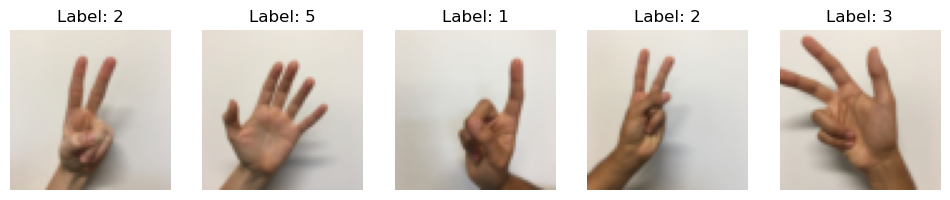

In [18]:
# ==============================
# 定义显示随机样本函数
# ==============================
def show_random_samples(X_orig, Y, classes, num_samples=5):
    """
    功能：
        从原始数据集中随机选择若干样本并显示对应的图片和标签。
    
    参数：
        X_orig -- 原始图像数组，shape = (N, H, W, C)，类型 uint8 或 float32
                  N = 样本数量，H = 高度，W = 宽度，C = 通道数（通常为3）
        Y -- 标签数组，shape = (N,)，每个值是类别索引
        classes -- 类别列表（numpy array），存放类别名称，可能是字节型（bytes）
        num_samples -- 随机显示的样本数量，默认值 = 5
    """

    # ==============================
    # 1. 转换数据为 PyTorch Tensor 格式
    # ==============================
    # X_orig 原始形状是 (N, H, W, C)，即 TensorFlow 风格
    # permute(0, 3, 1, 2) → 转换为 (N, C, H, W)，即 PyTorch 风格
    X_tensor = torch.tensor(X_orig, dtype=torch.float32).permute(0, 3, 1, 2)

    # ==============================
    # 2. 设置画布大小
    # ==============================
    # figsize=(12, 4) 表示整体宽度 12 英寸，高度 4 英寸
    plt.figure(figsize=(12, 4))
    
    # ==============================
    # 3. 随机选择样本并绘制
    # ==============================
    for i in range(num_samples):
        # (1,) 表示生成一个随机索引，item() 转换为 int
        idx = torch.randint(0, X_tensor.shape[0], (1,)).item()
        
        # 获取图像张量 (C, H, W)
        img = X_tensor[idx]
        # 获取对应标签索引
        label_idx = int(Y[idx])
        
        # 从类别列表中取类别名称
        cls = classes[label_idx]
        if isinstance(cls, bytes):   # 如果是 bytes，需要 decode
            cls = cls.decode("utf-8")
        else:
            cls = str(cls)           # 否则直接转为字符串
        
        # 转换维度 (C, H, W) → (H, W, C)，再转 numpy
        img_to_show = img.permute(1, 2, 0).numpy().astype(np.uint8)
        
        # 显示子图
        plt.subplot(1, num_samples, i+1)  # 一行 num_samples 列
        plt.imshow(img_to_show)           # 显示图像
        plt.title(f"Label: {cls}")        # 显示标签
        plt.axis("off")                   # 去掉坐标轴
    
    # ==============================
    # 4. 显示画布
    # ==============================
    plt.show()


# ==============================
# 调用函数显示随机 5 张样本
# ==============================
# 注意：这里传入的必须是原始数据（未展平的）
show_random_samples(X_train_orig, Y_train_orig, classes, num_samples=5)


### 3.3 构建三层全连接神经网络（MLP）

#### 网络整体结构
设计一个 **三层全连接神经网络 (Fully Connected Neural Network, FCNN)**，主要用于 **图像分类任务**（如手势识别）。  
其结构如下：

- **输入层**：接收展平后的图像（64x64x3 = 12288 维）
- **第一隐藏层**：25 个神经元，使用 ReLU 激活
- **第二隐藏层**：12 个神经元，使用 ReLU 激活
- **输出层**：6 个神经元（对应 6 类分类结果）


#### 类定义：`ThreeLayerNN`

#### 1. 初始化方法 `__init__`
在 `__init__` 中定义了网络的层结构与权重初始化。

- **输入参数**  
  - `input_size=12288` ：输入特征维度（64x64 彩色图片展平）  
  - `hidden1=25` ：第一隐藏层神经元数  
  - `hidden2=12` ：第二隐藏层神经元数  
  - `num_classes=6` ：输出类别数  

- **网络层定义**
  - `self.linear1 = nn.Linear(input_size, hidden1)`  
    将输入从 12288 维压缩到 25 维  
  - `self.linear2 = nn.Linear(hidden1, hidden2)`  
    将 25 维压缩到 12 维  
  - `self.linear3 = nn.Linear(hidden2, num_classes)`  
    将 12 维映射到 6 类输出  

- **激活函数**
  - `self.relu = nn.ReLU()`  
    在隐藏层之间引入非线性，提高模型表达能力  

- **权重初始化**
  - `nn.init.xavier_uniform_(self.linear1.weight)`  
  - `nn.init.xavier_uniform_(self.linear2.weight)`  
  - `nn.init.xavier_uniform_(self.linear3.weight)`  
  使用 **Xavier 初始化**，保持权重初始分布合理，避免梯度消失或爆炸。


#### 2. 前向传播 `forward`
定义了输入数据如何依次通过各层，得到最终输出。

- 输入张量：`x`，形状 `(batch_size, input_size)`  
- 计算流程：
  1. `x = self.relu(self.linear1(x))`  
     输入层 → 第一隐藏层 → ReLU  
  2. `x = self.relu(self.linear2(x))`  
     第一隐藏层 → 第二隐藏层 → ReLU  
  3. `x = self.linear3(x)`  
     第二隐藏层 → 输出层（不加激活，交给 `CrossEntropyLoss` 处理 Softmax）  

- 输出张量：`x`，形状 `(batch_size, num_classes)`


### 📌 逻辑关系总结
1. **输入层 → 第一隐藏层 → 第二隐藏层 → 输出层**
2. 隐藏层之间使用 **ReLU 激活函数**
3. 输出层不加激活函数，直接输出 logits，由 **交叉熵损失** 自动处理 Softmax
4. 使用 **Xavier 初始化** 提高训练稳定性



In [19]:
# ==============================
# 三层神经网络定义
# ==============================

class ThreeLayerNN(nn.Module):
    def __init__(self, input_size=12288, hidden1=25, hidden2=12, num_classes=6):
        """
        初始化三层全连接神经网络
        
        参数：
            input_size  -- 输入特征维度，默认 12288 (64x64x3 展平的图像像素数)
            hidden1     -- 第一隐藏层神经元个数，默认 25
            hidden2     -- 第二隐藏层神经元个数，默认 12
            num_classes -- 输出类别数，默认 6 (手势识别有 6 类)
        """
        # 调用父类构造函数，确保 nn.Module 正确初始化
        super().__init__()
        
        # 定义第一层：输入维度 = input_size，输出维度 = hidden1
        self.linear1 = nn.Linear(input_size, hidden1)
        # 定义第二层：输入维度 = hidden1，输出维度 = hidden2
        self.linear2 = nn.Linear(hidden1, hidden2)
        # 定义第三层（输出层）：输入维度 = hidden2，输出维度 = num_classes
        self.linear3 = nn.Linear(hidden2, num_classes)
        
        # 定义激活函数 ReLU，用于隐藏层之间
        self.relu = nn.ReLU()

        # ==============================
        # 权重初始化（Xavier 初始化）
        # ==============================
        # Xavier 初始化可以让网络在初始时保持合适的方差，避免梯度消失或爆炸
        nn.init.xavier_uniform_(self.linear1.weight)  # 初始化第一层权重
        nn.init.xavier_uniform_(self.linear2.weight)  # 初始化第二层权重
        nn.init.xavier_uniform_(self.linear3.weight)  # 初始化第三层权重
        # 注意：bias 默认会自动初始化为 0，这里不用手动设置

    def forward(self, x):
        """
        定义前向传播过程
        参数：
            x -- 输入张量，shape = (batch_size, input_size)
        返回：
            x -- 输出张量，shape = (batch_size, num_classes)
        """
        # 输入数据通过第一层 + ReLU
        x = self.relu(self.linear1(x))
        # 经过第二层 + ReLU
        x = self.relu(self.linear2(x))
        # 经过第三层（输出层，不加激活函数，交给 CrossEntropyLoss 处理 softmax）
        x = self.linear3(x)
        return x

In [20]:
# ==============================
# 创建模型实例
# ==============================
model = ThreeLayerNN()

# 打印模型结构
print(model)

ThreeLayerNN(
  (linear1): Linear(in_features=12288, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=6, bias=True)
  (relu): ReLU()
)


### 3.4 模型训练函数

**你的目标** 是构建一个能够高准确率识别手势的算法。为此，你将构建一个与之前用 numpy 实现的猫识别模型几乎相同的 PyTorch 模型（但现在输出层用的是 softmax）。这是一个很好的机会来比较你用 numpy 实现的模型和 PyTorch 实现的异同。

**模型结构** 是 *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*。原来的 SIGMOID 输出层被替换成了 SOFTMAX。SOFTMAX 层是 SIGMOID 在多分类问题上的推广，适用于多分类任务。
。


### 三层神经网络训练流程


#### 1️⃣ 功能概述
该训练函数 `train_model` 实现了 **三层全连接神经网络（ThreeLayerNN）** 的完整训练流程，适用于多分类任务。  
核心功能：
- 数据预处理与张量转换
- 模型初始化与权重设置
- 小批量梯度下降训练
- 损失记录与可视化
- 训练集与测试集准确率评估


#### 2️⃣ 数据与设备处理
1. **随机种子设置**：保证实验可复现  
   - `np.random.seed(1)`、`torch.manual_seed(1)`  
2. **设备选择**：自动选择 GPU（cuda）或 CPU（cpu）  
3. **数据转换**：
   - numpy 数组 → PyTorch 张量
   - 张量传到指定设备
4. **训练样本数量**：用于小批量划分和损失计算


#### 3️⃣ 模型初始化
- 使用 `ThreeLayerNN` 创建三层全连接网络
- 输入维度 = 样本特征数，输出维度 = 类别数
- 激活函数为 ReLU
- 权重采用 Xavier 初始化（提高训练稳定性）


#### 4️⃣ 优化器与损失函数
- **优化器**：Adam  
  - 自适应学习率更新，控制训练步长  
- **损失函数**：CrossEntropyLoss  
  - 多分类任务专用，输入 logits，输出类别概率  
- **损失记录**：每 5 个 epoch 记录一次，用于绘图


#### 5️⃣ 训练循环逻辑
1. **Epoch 遍历**（总轮数 = `num_epochs`）
2. **小批量划分**：
   - 随机打乱训练集索引
   - 按 `minibatch_size` 划分 batch
3. **小批量训练步骤**：
   - 梯度清零 (`optimizer.zero_grad()`)
   - 前向传播 → 输出 logits
   - 计算交叉熵损失
   - 反向传播 → 计算梯度 (`loss.backward()`)
   - 更新参数 (`optimizer.step()`)
   - 累积 batch 损失
4. **平均损失计算**：
   - 每个 epoch 的平均损失 = 累积损失 / 样本总数
   - 每 100 个 epoch 打印一次损失


#### 6️⃣ 损失可视化
- 绘制训练损失随 epoch 的变化曲线  
- 横轴：Epochs  
- 纵轴：平均损失  
- 可帮助分析收敛速度与训练稳定性


#### 7️⃣ 模型评估
1. **设置评估模式**：`model.eval()`  
   - 禁用 Dropout 和 BatchNorm 的训练行为  
2. **禁用梯度计算**：`with torch.no_grad()`  
3. **训练集和测试集预测**：
   - `torch.argmax` 获取每行最大值索引 → 类别预测  
4. **准确率计算**：
   - `(预测 == 标签).float().mean()` → 得到训练集和测试集准确率
5. 输出训练集和测试集准确率


#### 8️⃣ 流程图示意

数据加载与预处理

▼

训练集 / 测试集 → 张量化 & 设备迁移

▼

模型初始化 (ThreeLayerNN) + Xavier 权重

▼

优化器 & 损失函数设置

▼

┌─────────────┐

│ Epoch循环 │

│ ┌─────────┐ │

│ │ 小批量 │ │

│ │ 前向传播 │ │

│ │ 计算损失 │ │

│ │ 反向传播 │ │

│ │ 更新参数 │ │

│ └─────────┘ │

└─────────────┘

▼

损失记录与绘图

▼

训练集 & 测试集准确率计算

▼

返回训练好的模型



#### 9️⃣ 核心逻辑总结
- **随机性**：保证每个 epoch 样本顺序不同，增强模型泛化  
- **小批量训练**：平衡梯度稳定性和训练速度  
- **Adam 优化器 + CrossEntropyLoss**：适合多分类任务  
- **Xavier 初始化 + ReLU**：提高训练初期的稳定性  
- **可视化损失**：帮助判断收敛性  
- **准确率评估**：直观衡量模型性能



In [21]:
# ==============================
# 模型训练函数
# ==============================

def train_model(X_train, Y_train, X_test, Y_test,
                learning_rate=0.0001, num_epochs=1500, minibatch_size=32,
                print_cost=True, is_plot=True):
    """
    使用 PyTorch 训练一个三层神经网络 (ThreeLayerNN)
    
    参数：
        X_train       -- numpy array, 训练集特征, shape=(m_train, n_x), dtype=float32, 每行一个展平图像
        Y_train       -- numpy array, 训练集标签, shape=(m_train,), dtype=int64
        X_test        -- numpy array, 测试集特征, shape=(m_test, n_x)
        Y_test        -- numpy array, 测试集标签, shape=(m_test,)
        learning_rate -- float, 学习率, 控制梯度下降步长
        num_epochs    -- int, 总迭代次数, 控制训练轮数
        minibatch_size-- int, 小批量梯度下降每个 batch 的样本数
        print_cost    -- bool, 是否打印每 100 个 epoch 的损失
        is_plot       -- bool, 是否绘制损失曲线
    返回：
        model -- 训练好的 ThreeLayerNN 模型 (PyTorch nn.Module)
    """

    # ==============================
    # 1. 设置随机种子，保证实验可复现
    # ==============================
    # np.random.seed(1) 用于 numpy 随机数
    # torch.manual_seed(1) 用于 PyTorch CPU 随机数和初始化
    np.random.seed(1)
    torch.manual_seed(1)

    # ==============================
    # 2. 选择计算设备
    # ==============================
    # 如果有 GPU，则使用 GPU ("cuda")
    # 否则使用 CPU ("cpu")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # ==============================
    # 3. 数据转换为 PyTorch 张量，并发送到 device
    # ==============================
    # torch.from_numpy 将 numpy array 转换为 torch.Tensor
    # .to(device) 将张量移动到指定设备
    X_train_tensor = torch.from_numpy(X_train).to(device)  # shape=(m_train, n_x)
    Y_train_tensor = torch.from_numpy(Y_train).to(device)  # shape=(m_train,)
    X_test_tensor  = torch.from_numpy(X_test).to(device)   # shape=(m_test, n_x)
    Y_test_tensor  = torch.from_numpy(Y_test).to(device)   # shape=(m_test,)

    # 训练集样本数
    m_train = X_train.shape[0]

    # ==============================
    # 4. 初始化模型
    # ==============================
    # input_size = 特征数, 等于每张图像展平后的长度 (例如 64*64*3=12288)
    # 模型会包含三层全连接层和 ReLU 激活函数
    model = ThreeLayerNN(input_size=X_train.shape[1]).to(device)

    # ==============================
    # 5. 定义优化器和损失函数
    # ==============================
    # optimizer: 使用 Adam 优化器，更新模型参数，学习率 lr 控制步长
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # criterion: 使用交叉熵损失函数 CrossEntropyLoss
    # 适用于多分类任务, 输入为 logits, 标签为类别索引
    criterion = nn.CrossEntropyLoss()

    # costs 用于保存每 5 个 epoch 的平均损失
    costs = []

    # ==============================
    # 6. 开始训练循环
    # ==============================
    for epoch in range(num_epochs):
        # 随机打乱训练集索引，保证每个 epoch 样本顺序不同
        permutation = torch.randperm(m_train)  # 返回一个 shape=(m_train,) 的乱序索引
        epoch_cost = 0.0                        # 累积本 epoch 的总损失

        # ==============================
        # 6.1 遍历每个小批量
        # ==============================
        for i in range(0, m_train, minibatch_size):
            # 取当前 batch 的索引
            indices = permutation[i:i+minibatch_size]   # shape=(minibatch_size,)
            batch_x = X_train_tensor[indices]          # 当前 batch 特征, shape=(minibatch_size, n_x)
            batch_y = Y_train_tensor[indices]          # 当前 batch 标签, shape=(minibatch_size,)

            # 梯度清零，避免梯度累加
            optimizer.zero_grad()

            # 前向传播计算预测 logits
            outputs = model(batch_x)                    # shape=(minibatch_size, num_classes)

            # 计算当前 batch 的交叉熵损失
            loss = criterion(outputs, batch_y)          # loss 为 scalar 张量

            # 反向传播计算梯度
            loss.backward()

            # 更新模型参数
            optimizer.step()

            # 累加当前 batch 的损失到本 epoch 总损失中
            # loss.item()：将当前 batch 的交叉熵损失 tensor 转换为 Python float 值
            # batch_x.size(0)：当前 batch 的样本数量（通常等于 minibatch_size，最后一个 batch 可能更少）
            # 这样做可以保证损失按照样本数加权，而不是简单平均每个 batch 的损失
            epoch_cost += loss.item() * batch_x.size(0)

        # 计算本 epoch 的平均损失
        # 将累计的总损失除以训练集总样本数 m_train
        # 得到每个样本的平均损失，便于比较不同 epoch 的训练效果
        epoch_cost /= m_train
            

        # 每 5 个 epoch 保存一次成本，用于绘图
        if epoch % 5 == 0:
            costs.append(epoch_cost)

        # 每 100 个 epoch 打印一次平均损失
        if print_cost and epoch % 100 == 0:
            print(f"Epoch {epoch}: cost = {epoch_cost:.6f}")

    # ==============================
    # 7. 绘制成本曲线
    # ==============================
    if is_plot:
        plt.plot(np.arange(0, num_epochs, 5), costs, marker='o')  # 横轴为 epoch, 纵轴为平均损失
        plt.xlabel('Epochs')          # x 轴标签
        plt.ylabel('Cost')            # y 轴标签
        plt.title(f'Learning rate = {learning_rate}')  # 标题显示学习率
        plt.grid(True)                # 显示网格
        plt.show()

    # ==============================
    # 8. 计算训练集和测试集准确率
    # ==============================
    # -----------------------------
    # 将模型切换到评估模式
    # -----------------------------
    model.eval()  
    # 说明：
    # - 对于训练阶段使用的层，如 dropout 或 batch normalization，在 eval() 模式下会关闭 dropout 并固定 batchnorm 的均值和方差
    # - 避免在评估时产生随机性或数据漂移
    
    # -----------------------------
    # 关闭梯度计算
    # -----------------------------
    with torch.no_grad():  
        # 说明：
        # - 评估模型时不需要梯度计算，关闭梯度可以节省内存，加快推理速度
    
        # -----------------------------
        # 在训练集上进行预测
        # -----------------------------
        train_preds = torch.argmax(model(X_train_tensor), dim=1)  
        # 解释：
        # - model(X_train_tensor) 输出 logits，形状为 (m_train, num_classes)
        # - torch.argmax(..., dim=1) 对每一行取最大值的索引，得到预测类别索引
        # - train_preds 形状 = (m_train,)，每个元素是预测类别索引
    
        train_acc = (train_preds == Y_train_tensor).float().mean()  
        # 解释：
        # - train_preds == Y_train_tensor 会生成布尔张量，True 表示预测正确，False 表示错误
        # - .float() 将布尔值转换为浮点数，True=1.0，False=0.0
        # - .mean() 计算平均值，即训练集上的准确率
    
        # -----------------------------
        # 在测试集上进行预测
        # -----------------------------
        test_preds = torch.argmax(model(X_test_tensor), dim=1)  
        # 逻辑同训练集预测，输出测试集每个样本的预测类别索引
    
        test_acc = (test_preds == Y_test_tensor).float().mean()  
        # 计算测试集准确率，同训练集

   
    print(f"训练集准确率: {train_acc.item() * 100:.2f}%")
    print(f"测试集准确率: {test_acc.item() * 100:.2f}%")

    # 返回训练好的模型
    return model


### 3.5 预测函数


#### 1️⃣ 功能概述
该函数 `predict` 用于 **使用训练好的三层神经网络模型对新样本进行预测**。  
核心功能：
- 将输入数据转换为 PyTorch 张量
- 将模型切换到评估模式
- 前向传播得到预测 logits
- 返回类别索引作为预测结果


#### 2️⃣ 输入输出
- **输入**
  - `model`：已训练好的 PyTorch 模型（ThreeLayerNN）
  - `X`：numpy 数组，形状 `(N, D)`，每行一个样本特征
- **输出**
  - `predictions`：numpy 数组，形状 `(N,)`，每个元素为预测类别索引


#### 3️⃣ 逻辑流程

1. **设备选择**
   - 检测是否有 GPU 可用 (`cuda`)，否则使用 CPU  
   - 兼容不同硬件环境

2. **模型评估模式**
   - `model.eval()`  
   - 关闭 Dropout 和 BatchNorm 的训练行为，保证预测稳定

3. **数据张量化**
   - `X_tensor = torch.from_numpy(X).to(device)`  
   - 将 numpy 数组转换为 PyTorch 张量，并移动到指定设备

4. **关闭梯度计算**
   - `with torch.no_grad()`  
   - 节省显存，加快预测速度

5. **前向传播**
   - `logits = model(X_tensor)`  
   - 得到每个样本的未归一化类别得分

6. **类别选择**
   - `predictions = torch.argmax(logits, dim=1)`  
   - 每行取最大值索引作为预测类别

7. **返回结果**
   - `predictions.cpu().numpy()`  
   - 将结果转回 CPU 并转换为 numpy 数组，便于后续处理


#### 4️⃣ 流程图示意

输入 X (N, D)

▼

张量转换 & 设备迁移

▼

模型切换到评估模式

▼

前向传播 → logits (N, num_classes)

▼

每行取最大值索引 → 预测类别

▼

转为 numpy 数组 → 输出 predictions (N,)



#### 5️⃣ 核心逻辑总结
- **兼容 CPU/GPU**：自动选择设备
- **评估模式**：确保预测一致性
- **前向传播 + argmax**：得到类别预测
- **无梯度计算**：加速预测，节省显存
- **返回 numpy**：方便与其他工具结合使用


In [22]:
# ==============================
# 定义预测函数
# ==============================
def predict(model, X):
    """
    使用训练好的模型对输入特征 X 进行预测，并返回预测类别索引

    参数：
    model -- 已训练好的 PyTorch 模型
    X     -- 输入特征数组，shape = (N, D)，numpy array

    返回：
    predictions -- 预测类别索引，numpy array，shape = (N,)
    """

    # -----------------------------
    # 判断是否有 GPU 可用，否则使用 CPU
    # -----------------------------
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # 说明：
    # - "cuda" 表示使用 GPU
    # - "cpu" 表示使用 CPU
    # - 这样写可以兼容有无 GPU 的环境

    # -----------------------------
    # 将模型切换到评估模式
    # -----------------------------
    model.eval()
    # 说明：
    # - 关闭 dropout 层、batchnorm 层的训练状态，固定参数
    # - 避免在预测时产生随机性

    # -----------------------------
    # 将输入数据 X 转为 PyTorch 张量，并移动到 device
    # -----------------------------
    X_tensor = torch.from_numpy(X).to(device)
    # 说明：
    # - torch.from_numpy(X) 将 numpy 数组转换为 tensor
    # - .to(device) 将数据移动到 GPU 或 CPU
    # - shape = (N, D)，dtype = float32（如果 X 是 float32）

    # -----------------------------
    # 关闭梯度计算，加快预测速度并节省显存
    # -----------------------------
    with torch.no_grad():
        # -----------------------------
        # 模型前向传播，得到 logits
        # -----------------------------
        logits = model(X_tensor)
        # 说明：
        # - logits 形状 = (N, num_classes)
        # - 每行表示每个类别的未归一化得分

        # -----------------------------
        # 取每行最大值的索引作为预测类别
        # -----------------------------
        predictions = torch.argmax(logits, dim=1)
        # 说明：
        # - dim=1 表示在每一行中找最大值
        # - 输出 shape = (N,)
        # - 每个元素是预测的类别索引

    # -----------------------------
    # 将预测结果从 GPU 转回 CPU，并转换为 numpy 数组返回
    # -----------------------------
    return predictions.cpu().numpy()
    # 说明：
    # - .cpu() 将 tensor 移到 CPU
    # - .numpy() 转为 numpy array


### 3.6 模型训练和预测

训练样本数: 1080
测试样本数: 120
特征维度: 12288
类别数: 6
Epoch 0: cost = 1.813363
Epoch 100: cost = 0.972989
Epoch 200: cost = 0.740805
Epoch 300: cost = 0.595044
Epoch 400: cost = 0.526998
Epoch 500: cost = 0.369317
Epoch 600: cost = 0.271284
Epoch 700: cost = 0.187608
Epoch 800: cost = 0.129969
Epoch 900: cost = 0.095204
Epoch 1000: cost = 0.055713
Epoch 1100: cost = 0.036033
Epoch 1200: cost = 0.021344
Epoch 1300: cost = 0.011821
Epoch 1400: cost = 0.008064


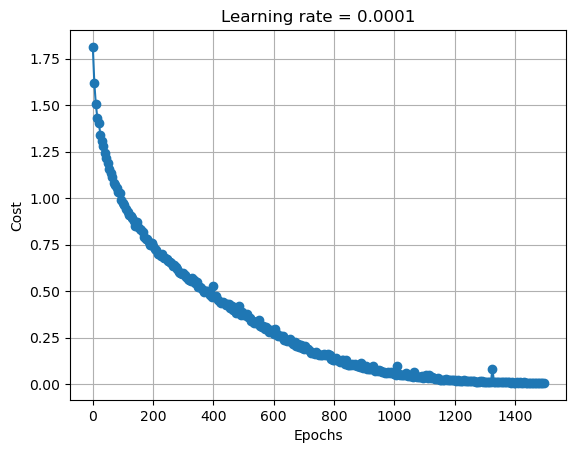

训练集准确率: 100.00%
测试集准确率: 81.67%
测试集预测类别索引: [2 0 0 5 1 0 2 1 5 1 5 1 0 1 1 3 5 2 0 4 5 4 2 4 0 5 4 2 1 5 4 1 0 3 1 1 0
 4 4 3 0 3 0 2 3 1 2 2 0 3 4 1 2 0 5 0 4 0 4 5 5 2 2 4 4 4 0 1 0 4 0 4 3 2
 3 4 3 5 1 5 2 0 1 3 2 4 4 1 4 5 5 0 0 5 5 5 3 3 5 2 2 1 0 2 2 3 0 2 4 4 1
 0 2 4 5 2 1 3 1 3]


In [23]:
# ==============================
# 主流程
# ==============================
if __name__ == "__main__":
    # -----------------------------
    # 1. 加载数据
    # -----------------------------
    # 调用 load_dataset() 函数，返回原始训练集和测试集数据，以及类别列表
    X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
    # X_train_orig: (m_train, H, W, C) 原始训练图像
    # Y_train_orig: (m_train,) 训练标签
    # X_test_orig:  (m_test, H, W, C) 原始测试图像
    # Y_test_orig:  (m_test,) 测试标签
    # classes:     类别列表，例如 ['A', 'B', 'C', ...]

    # -----------------------------
    # 2. 数据预处理
    # -----------------------------
    # 对原始图像进行展平和归一化，并将标签转为整数索引
    X_train, Y_train, X_test, Y_test = preprocess_data(
        X_train_orig, Y_train_orig, X_test_orig, Y_test_orig
    )
    # X_train: (m_train, H*W*C) float32 归一化特征
    # Y_train: (m_train,) int64 标签索引
    # X_test, Y_test: 同理

    # -----------------------------
    # 3. 打印数据基本信息
    # -----------------------------
    print("训练样本数:", X_train.shape[0])          # m_train
    print("测试样本数:", X_test.shape[0])           # m_test
    print("特征维度:", X_train.shape[1])           # 输入维度 D = H*W*C
    print("类别数:", len(np.unique(Y_train)))      # 类别数量

    # -----------------------------
    # 4. 训练模型
    # -----------------------------
    # 调用 train_model() 函数，训练三层神经网络
    trained_model = train_model(
        X_train, Y_train, X_test, Y_test,
        learning_rate=0.0001,   # 学习率
        num_epochs=1500,        # 迭代次数
        minibatch_size=32       # 小批量大小
    )
    # 返回训练好的模型对象 trained_model (PyTorch Module)

    # -----------------------------
    # 5. 对测试集进行预测
    # -----------------------------
    predictions = predict(trained_model, X_test)
    # predictions: numpy array, shape = (m_test,)
    # 每个元素是模型预测的类别索引

    # -----------------------------
    # 6. 输出测试集预测结果
    # -----------------------------
    print("测试集预测类别索引:", predictions)


## 3.7 随机预测可视化

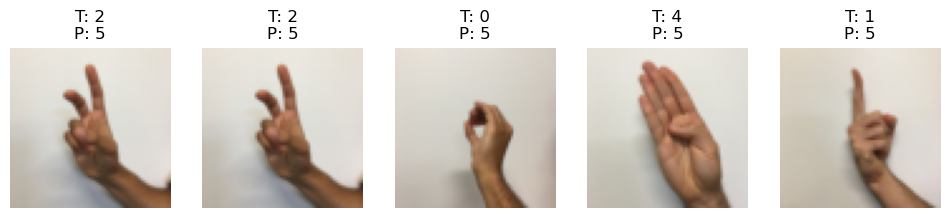

In [24]:
def show_random_predictions(model, X_orig, Y_orig, classes, num_samples=5):
    """
    随机显示模型预测结果
    """
    # 转换成 (N, C, H, W)
    X = torch.tensor(X_orig, dtype=torch.float32).permute(0, 3, 1, 2) / 255.0
    Y = torch.tensor(Y_orig, dtype=torch.long)

    model.eval()
    plt.figure(figsize=(12, 4))
    
    for i in range(num_samples):
        idx = torch.randint(0, X.shape[0], (1,)).item()
        img = X[idx]  # (C, H, W)
        true_label_idx = Y[idx].item()
        
        # 模型预测（展平）
        with torch.no_grad():
            img_flat = img.reshape(1, -1) 
            output = model(img_flat)
            pred_label_idx = torch.argmax(output, 1).item()
        
        # 获取类别名称
        true_label = classes[true_label_idx]
        pred_label = classes[pred_label_idx]
        if isinstance(true_label, bytes):
            true_label = true_label.decode("utf-8")
        if isinstance(pred_label, bytes):
            pred_label = pred_label.decode("utf-8")
        
        # (C, H, W) -> (H, W, C)
        img_to_show = img.permute(1, 2, 0).numpy()
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img_to_show)
        plt.title(f"T: {true_label}\nP: {pred_label}")
        plt.axis("off")
    
    plt.show()


# ==============================
# 调用函数，随机显示 5 个预测样本
# ==============================
show_random_predictions(model, X_test_orig, Y_test_orig, classes, num_samples=5)


**见解**：  
- 你的模型看起来足够大，可以很好地拟合训练集。然而，鉴于训练准确率和测试准确率的差异，你可以尝试添加 L2 正则化或 dropout 来减少过拟合。  
- 在 PyTorch 中，可以理解为每次遍历一个小批量数据（batch）时，进行一次前向传播和反向传播，更新模型参数。经过多次 epoch 迭代，模型最终学到良好的参数。PyTorch 不需要显式的 session 管理，代码更直观。
1500个epoch），直到得到训练良好的参数。


<font color='blue'>

**你应该记住的内容**：  
- PyTorch 是深度学习中使用的编程框架  
- PyTorch 中两个主要的对象类型是张量（Tensors）和动态计算图（Dynamic Computation Graph）  
- 使用 PyTorch 编程时的典型步骤：  
    - 直接创建张量并定义操作，计算图是即时动态构建的  
    - 定义模型（通常继承自 `nn.Module`）  
    - 定义损失函数和优化器  
    - 通过调用 `.backward()` 自动执行反向传播  
    - 调用优化器的 `.step()` 方法更新参数  
- PyTorch 不需要显式创建会话（session）或初始化步骤，代码即时执行  
- 训练过程中，前向和反向传播以及参数更新都是自动管理的，调用接口简单易用

</font>
 
</font>
